In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [4]:
x_data = np.linspace(0.0,10.0,1000000)

In [5]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [6]:
noise = np.random.randn(len(x_data))

In [7]:
noise

array([-0.03560517,  0.84828395, -0.27953163, ...,  0.24334122,
       -0.40590805,  0.20444759])

y = mx + b
m = 0.5
b = 5

In [8]:
b = 5
y_true = (x_data*0.5) + 5 + noise

In [9]:
y_true


array([ 4.96439483,  5.84828895,  4.72047837, ..., 10.24333122,
        9.59408695, 10.20444759])

In [10]:
x_df = pd.DataFrame(data = x_data , columns = ['X Data'])

In [11]:
y_df = pd.DataFrame(data = y_true , columns = ['Y True'])

In [12]:
my_data = pd.concat([x_df,y_df] , axis = 1)

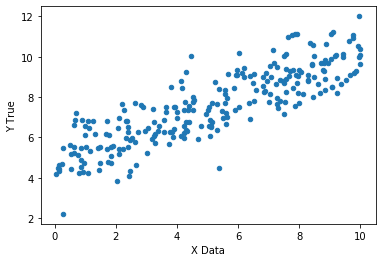

In [13]:
my_data.sample(n = 250).plot(kind = 'scatter' , x ='X Data' , y ='Y True')

In [14]:
batch_size = 8


In [15]:
m = tf.Variable(0.33)
b = tf.Variable(0.133)

In [16]:
xph = tf.placeholder(tf.float32,[batch_size])

In [17]:
yph = tf.placeholder(tf.float32,[batch_size])

In [18]:
y_model = m*xph +b

In [19]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [21]:
init = tf.global_variables_initializer()

In [22]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        rand_int = np.random.randint(len(x_data), size = batch_size)
        feed = {xph:x_data[rand_int],yph:y_true[rand_int]}
        sess.run(train,feed_dict = feed)
    
    model_m,model_b = sess.run([m,b])

In [23]:
model_b

4.869309

In [24]:
model_m

0.5430003

In [25]:
y_hat = x_data*model_m + model_b

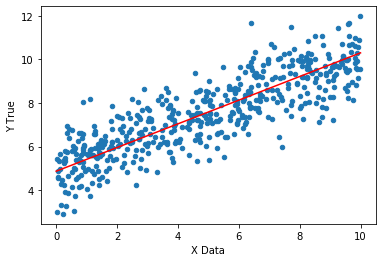

In [26]:
my_data.sample(500).plot(kind = 'scatter',x='X Data',y = 'Y True')
plt.plot(x_data,y_hat,'r')

In [27]:
feat_cols = [tf.feature_column.numeric_column('x', shape = [1] )]

In [28]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\LINJO\\AppData\\Local\\Temp\\tmpoiq8z9yv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024B23AC0888>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [29]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size =0.3,random_state = 101)

In [36]:
x_train.shape

(700000,)

In [37]:
x_test.shape

(300000,)

In [38]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [39]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)